<h1>Die Convolution und Pooling Operationen</h1><br>
Convolutional Neural Networks dienen der Arbeit mit Bildern. Ihre Genauigkeit übertrifft denen normaler NNs. Das liegt daran, dass bevor die Bilder in dicht vernetzte Schichten (<code>Dense</code>) eingespeist werden, werden sie durch zwei andere Arten von Schichten geschickt.<br><br>
<b>Die Convolution-Operation</b><br>
Abstrakt gesagt ist der Unteschied zwischen normalen NNs und CNNs, dass CNNs lokale Muster lernen, während NNs sich auf gloable Muster beschränken müssen. Dabei lernen die Convolutional Schichten die lokalen Muster. Ist eine Muster an einer Stelle im Bild gelernt, kann es überall wiedererkannt werden. Mehrere Convolutional Schichten hintereinander können komplexere Muster im Bild erkennen und somit etwas anhand komplexer Konzepte im Bild erkennen. Das passiert, indem die einfachen Muster der ersten Convolution-Schicht, wie "vertikaler Strich" oder "Strich von oben links nach unten rechts", sich in darauffolgenden Schichten zu komplexeren Mustern zusammensetzen, wie "Ohr" oder "Auge" beim Erkennen menschlicher Gesichter.<br><br><img src="./imgs/cnn_cat.png"><br><br>
Der Input in ein CNN sind Bilder mit den Dimensionen <code>(height, width, channels)</code>. Die Channels beschreiben z.B. Farbanteile wie rot, grün, blau (RGB). Im Falle von RGB wären es also drei Channel. Im Falle eines schwarz-weißen Bildes wäre es 1, die Graustufen. Die Convolution extrahiert darauf kleinere Teile des Bildes, meist der Größe (3, 3) oder (5, 5). Über diese wird Pixel für Pixel ein Filter geschoben, der kleine Muster, wie z.B. "querer Strich" kodiert. Der Rückgabewert der Schicht ist dann ein Tensor der Dimension <code>(height - k, width - k, Anzahl Filter)</code>. k sind ein oder zwei Pixel am Rand, die nicht mit einbezogen werden können, weil die Filter sonst teilweise nicht im Bild liegen würden. Jeder Filter gibt eine sogenannte Response Map (<code>(height - k, width - k, 1)</code>) zurück, die zeigt, welche Teile des Bilder am ehesten dem Filter entsprechen.<br><br><img src="./imgs/cnn_filter.png"><br><br>
Dabei wird zuerst der kleine Teil extrahiert. Das "filtern" erfolgt über Matrixoperation mit einem Kernel. Der Kernel kodiert das Konzept, indem er die Bedeutung der Pixel um den Mittelpixel gewichtet. Die Berechnung erfolgt dann mittels der Matrixmultiplikation zwischen Ausschnitt und Kernel/Filter für jeden Kernel (Anzahl Kernel -> Output Depth), Dimension <code>(1, 1, Anzahl Filter)</code>. Dann wird der Ausschnitt untersucht, der sich einen Pixel weiter befindet, wiederholt, usw. Die 1 * 1 Ausschnitte werden dann woeder zur Feature Map zusammengesetzt für jeden der Kernel.<br><br><img src="./imgs/cnn_feature_maps.png"><br><br>
Will man eine Feature Map als Output, die die gleichen Dimensionen hat wie die des Inputs, kann man dies über das Padding steuern. Padding fügt dem Bild am Rand genügend Pixel hinzu, sodass der Ausschnitt niemals außerhalb des Bildes liegen kann. Außerdem beeinflusst das Striding die Größe des Outputs. Striding beschreibt, um wie viele Pixel der Ausschnitt springt. Allerdings wird selten ein Striding != 1 genutzt.<br><br>
<b>Die Max-Pooling-Operation</b><br><br>
Diese Schichten werden genutzt, um ein Bild aggressiv zu verkleinern. Ähnlich den Convolution-Schichten entziehen sie dem Bild kleinere Bilder. Meistens bestehen diese kleineren Bilder aus 2 * 2-Ausschnitten mit einem Stride von 2, also existiert keine Überlappung. Aus diesen Ausschnitten wird eine der Maximalwert entnommen und in die nächste Schicht eingespeist. Aber warum sollte das getan werden? Zum einen werden dadurch die Muster "gepresst", sodass Muster auf einem höheren Level gelernt werden können und zum anderen bedürften das Modell sonst zu viele Parameter, was zu Overfitting führt.

In [5]:
# Aus Datensatz einen kleineren zum üben erstellen
import os, shutil

# create new directory for downsized dataset
org_data_dir = '/home/dominik/Documents/Datasets/cats_and_doggos/train'
small_data_dir = '/home/dominik/Documents/Datasets/cats_and_doggos/small'
if not os.path.isdir(small_data_dir):
    os.mkdir(small_data_dir)
    print('Small noch nicht vorhanden.')
else:
    print('Small vorhanden.')

# directories train, validation and test
train_dir = os.path.join(small_data_dir, 'train')
val_dir = os.path.join(small_data_dir, 'val')
test_dir = os.path.join(small_data_dir, 'test')

if not os.path.isdir(train_dir):
    os.mkdir(train_dir)
    os.mkdir(val_dir)
    os.mkdir(test_dir)
    print('Sets noch nicht vorhanden.')
else:
    print('Sets vorhanden.')

train_cats_dir = os.path.join(train_dir, 'cat')
val_cats_dir = os.path.join(val_dir, 'cat')
test_cats_dir = os.path.join(test_dir, 'cat')

train_dogs_dir = os.path.join(train_dir, 'dog')
val_dogs_dir = os.path.join(val_dir, 'dog')
test_dogs_dir = os.path.join(test_dir, 'dog')

if not os.path.isdir(train_cats_dir):
    print('Unterteilungen noch nicht vorhanden.')
    os.mkdir(train_cats_dir)
    os.mkdir(val_cats_dir)
    os.mkdir(test_cats_dir)

    os.mkdir(train_dogs_dir)
    os.mkdir(val_dogs_dir)
    os.mkdir(test_dogs_dir)
else:
    print('Unterteilungen bereits vorhanden.')

print('\n')
if not os.path.exists(os.path.join(train_cats_dir, 'cat.28.jpg')):
    set_ranges = {
        'train': range(1000),
        'val': range(1000, 1500),
        'test': range(1500, 2000)
    }
    
    for animal in ['dog', 'cat']:
        for set in ['train', 'val', 'test']:
            
            file_names = ['{0}.{1}.jpg'.format(animal, i) for i in set_ranges[set]]
            print(file_names[28])
            
            for file_name in file_names:
                src = os.path.join(org_data_dir, file_name)
                dst = os.path.join(small_data_dir, set, animal, file_name)
                shutil.copyfile(src, dst)


Small vorhanden.
Sets vorhanden.
Unterteilungen bereits vorhanden.




<b>Vorbereitung der Daten</b><br>
Die Bilder müssen vorher in die richtige Form umgewandelt werden, da das Netz nicht einfach so die JPGs aufnehmen kann. Dazu werden die Bilder gelesen, in RGB-float-Tensoren umgewandelt, und dann die Pixelwerte von 0 bis 255 auf 0 bis 1 umgewandelt, da NNs eher kleine Werte aufnehmen sollten. Diese Aufgaben übernimmt der <code>ImageDataGenerator</code>, der in Keras enthalten ist.

In [6]:
from keras.preprocessing.image import ImageDataGenerator

rescale_factor = 1.0 / 255.0 # sets values in [0,255] to [0,1]
image_size = (150, 150) # will automatically resize images to these dimensions

# constructor ImageDataGenerator, every iteration in for ... in gives batch of 20
train_generator = ImageDataGenerator(rescale = rescale_factor).flow_from_directory(
    train_dir, # target directory
    target_size = image_size,
    batch_size = 20,
    class_mode = 'binary' # binary_crossentropy loss --> binary labels
                          # binäre Labels werden anscheinend schon anhand der Ordner zugeordnet
)

val_generator = ImageDataGenerator(rescale = rescale_factor).flow_from_directory(
    val_dir,
    target_size = image_size,
    batch_size = 20,
    class_mode = 'binary'
)

# schauen wir uns einen Batch an, der vom Generator erzeugt wird
i = 0
for (data_batch, label_batch) in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', label_batch)
    i += 1
    if i > 5:
        break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: [1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
data batch shape: (20, 150, 150, 3)
labels batch shape: [1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.]
data batch shape: (20, 150, 150, 3)
labels batch shape: [0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.]
data batch shape: (20, 150, 150, 3)
labels batch shape: [0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
data batch shape: (20, 150, 150, 3)
labels batch shape: [0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
data batch shape: (20, 150, 150, 3)
labels batch shape: [0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.]


Es ist zu sehen, dass der Tensor die Form <code>(20, 150, 150, 3)</code> hat. 20 Bilder, 150 mal 150 Pixel, rot, grün, blau. Die Labels werden automatisch aus den gegebenen Unterordnern generiert und binär benannt, darum das Argument 'binär'. Dieser Generator kann nun ewig Daten generieren, weshalb dem Modell gesagt werden muss, wie viele Bilder sich in dem Ordner befinden, um zu wissen, wann eine Epoche vorbei ist. Dazu gibt es <code>steps_per_epoch</code>. Hier mit 2000 Bildern und Batches von 20 brauchen wir also 100 Schritte, um einmal alle Bilder erhalten zu haben. Außerdem wird beim Trainieren des Modells nun <code>fit_generator()</code> genutzt. Was ist mit den Validierungsdaten? Diese können ein Tupel von np-Arrays sein, wie gehabt, oder ein Generator. Im Falle eines Generators muss dem Modell mittels <code>validation_steps</code> gesagt werden, wie viele Batches gezogen werden, damit eine Epoche erfüllt ist. Beachte, dass Validierungs- und Trainingsdaten schon lange getrennt worden sind. Auf zum Modell!

In [7]:
from keras import layers
from keras import models

# man sieht, dass die Zahl der Filter weiter ansteigt, während die Bildgröße weiter reduziert wird
# so wird in fast allen covnets vorgegangen
model = models.Sequential()
model.add(
    layers.Conv2D(
        32, # Anzahl Filter, dritte Outputdimesion
        (3, 3), # Größe der Filter, die nach Mustern suchen
        activation = 'relu',
        input_shape = (150, 150, 3) # 150 mal 150, RGB-Werte
    )
)
model.add(layers.MaxPooling2D((2, 2))) # Maximum aus 2 mal 2 Feldern im Bild, verkleinert Bild
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # die reduzierten feature maps werden in ein 1D-Array gestampft für die Dense-Schichten
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) # binäre Klassifikation

model.summary() # um zu sehen, wie sich die Dimension verändern

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
# usual RMSprop optimizer, binary crossentropy als loss-Funktion
from keras import optimizers

model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(lr = 1e-4),
    metrics = ['acc']
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = val_generator,
    validation_steps = 50
)
model.save('cats_and_dogs_small.h5') # .h5, Format, um große Datenmengen zu speichern

Epoch 1/30
100/100 [==============================] - 65s 652ms/step - loss: 0.6903 - acc: 0.5285 - val_loss: 0.6712 - val_acc: 0.5730
Epoch 2/30
100/100 [==============================] - 61s 614ms/step - loss: 0.6608 - acc: 0.5990 - val_loss: 0.6645 - val_acc: 0.5640
Epoch 3/30
100/100 [==============================] - 59s 593ms/step - loss: 0.6207 - acc: 0.6610 - val_loss: 0.6159 - val_acc: 0.6520
Epoch 4/30
100/100 [==============================] - 61s 607ms/step - loss: 0.5733 - acc: 0.6950 - val_loss: 0.6045 - val_acc: 0.6620
Epoch 5/30
100/100 [==============================] - 60s 601ms/step - loss: 0.5368 - acc: 0.7285 - val_loss: 0.5919 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 60s 602ms/step - loss: 0.5167 - acc: 0.7395 - val_loss: 0.5686 - val_acc: 0.6860
Epoch 7/30
100/100 [==============================] - 60s 602ms/step - loss: 0.4921 - acc: 0.7615 - val_loss: 0.5723 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 6

In [10]:
from keras import models

model = models.load_model('cats_and_dogs_small.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
Training accuracy in blue, validation accuracy in red, max validation accuracy in green


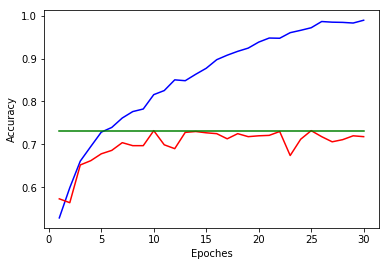

Training loss in blue, validation loss in red, minimum validation loss in green


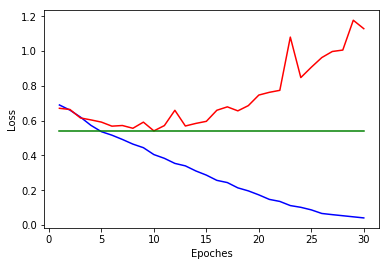

0.5413588285446167


In [20]:
import matplotlib.pyplot as plt

num_epochs = 30
epochs = range(1, num_epochs + 1)

train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print(history.history.keys())

print('Training accuracy in blue, validation accuracy in red, max validation accuracy in green')
plt.plot(
    epochs, train_acc, 'b',
    epochs, val_acc, 'r',
    epochs, [max(val_acc) for _ in range(num_epochs)], 'g-'
)
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.show()

print('Training loss in blue, validation loss in red, minimum validation loss in green')
plt.plot(
    epochs, train_loss, 'b',
    epochs, val_loss, 'r',
    epochs, [min(val_loss) for _ in range(num_epochs)], 'g-'
)
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()
